# HOUSING MARKET DATA ANALYSIS AND PRICE PREDICTION

### Data Loading And Initial Setup

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
# Set visualization style
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
# The CSV file is located at 'c:\Users\OWNER\Desktop\myProjects\Reviews - Copy - Copy (13) - Copy\updated_house_data.csv'
file_path = 'c:\\Users\\OWNER\\Desktop\\myProjects\\Reviews - Copy - Copy (13) - Copy\\updated_house_data.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  SalePrice Cat

### EXPLORATORY DATA ANALYSIS
***Understand Structure, Missing Values, and Feature Types***

In [9]:
# Get the dimensions of the dataset (rows, columns)
print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Get a concise summary of the dataframe, including data types and non-null values
print("\nDataset Info:")
df.info()

Dataset shape: 1460 rows and 82 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  

#### OBSERVATION
The output from df.info() is very revealing. We have 1460 entries (houses) and 82 columns (features). We can see a mix of data types: int64 (integers), float64 (floating-point numbers), and object (typically strings/categorical data). We can also see that several columns like Alley, FireplaceQu, PoolQC, Fence, and MiscFeature have a large number of missing values.

All we need for this specific task of using a single numeric feature is to ensure our chosen feature and the target (SalePrice) are clean.

### Descriptive Statistics for Numeric Features

In [11]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.20

#### OBSERVATION

The describe() output gives us the count, mean, standard deviation, min, max, and quartile values. For SalePrice, we can see the average price (in $) is around 180,921, with a minimum of 34,900` and a maximum of 755,000. The large standard deviation (79,442) suggests a wide spread in prices.

###  Visualizing the Target Variable: SalePrice

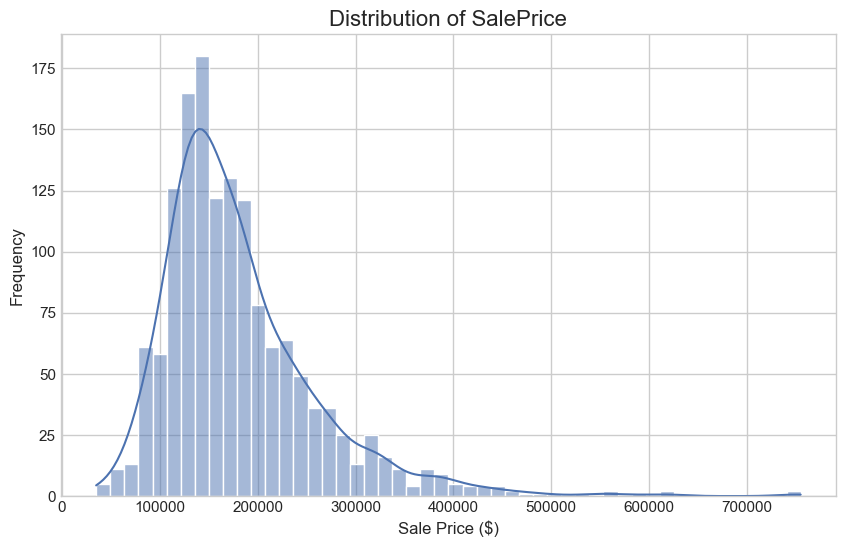

In [13]:
# Visualize the distribution of the target variable, SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice', fontsize=16)
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### OBSERVATION

The histogram shows that SalePrice is right-skewed. Most houses are clustered on the lower end of the price scale, with fewer and fewer houses as the price gets very high.

### Finding the Best Feature to Predict SalePrice Using Correlation Matrix

In [15]:
# Calculate the correlation matrix for numeric features
correlation_matrix = df.corr(numeric_only=True)

# Get the top 10 features most correlated with SalePrice
top_corr_features = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice']
print("\nTop 10 Features Correlated with SalePrice:")
print(top_corr_features)


Top 10 Features Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


#### OBSERVATION

From the correlation list, OverallQual (Overall Quality) has the highest correlation with SalePrice (0.79), followed by GrLivArea (Above Grade Living Area) at 0.71. It makes sense as higher quality and larger houses tend to be more expensive. 

GrLivArea is an excellent choice. It's a continuous, easy-to-understand feature.

### Visualize the Relationship

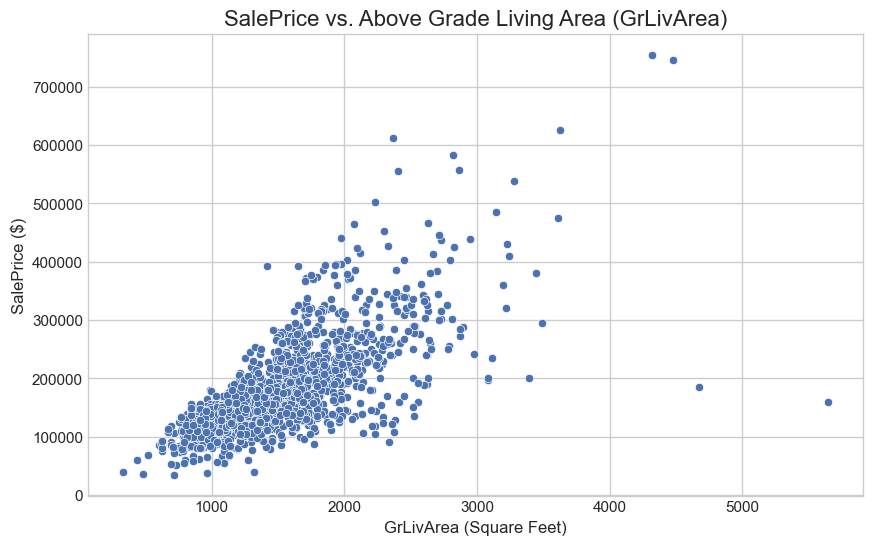

In [17]:
# Scatter plot to visualize the relationship between GrLivArea and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('SalePrice vs. Above Grade Living Area (GrLivArea)', fontsize=16)
plt.xlabel('GrLivArea (Square Feet)', fontsize=12)
plt.ylabel('SalePrice ($)', fontsize=12)
plt.show()

### Observation 

The scatter plot clearly shows a positive linear relationship. As the living area (GrLivArea) increases, the SalePrice also tends to increase. There are a few outliers, especially the two houses with very large living areas but surprisingly low prices on the bottom right.

### Model Implementation: Linear Regression

In [19]:
# Define Feature (X) and Target (y)
# Reshaping X to be a 2D array for scikit-learn
X = df[['GrLivArea']] 
y = df['SalePrice']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1168 samples
Testing set size: 292 samples


In [21]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the model's learned coefficients
# For y = mx + c, this gives us the slope (m) and intercept (c)
print(f"\nModel Intercept (c): {model.intercept_}")
print(f"Model Slope (m): {model.coef_[0]}")


Model Intercept (c): 24899.74815733821
Model Slope (m): 102.48895891672332


In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('\n--- Model Evaluation ---')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared (R²):', metrics.r2_score(y_test, y_pred))


--- Model Evaluation ---
Mean Absolute Error (MAE): 38341.204476421066
Mean Squared Error (MSE): 3418946311.1808066
R-squared (R²): 0.5542632452871117


### Visualize the Regression Line

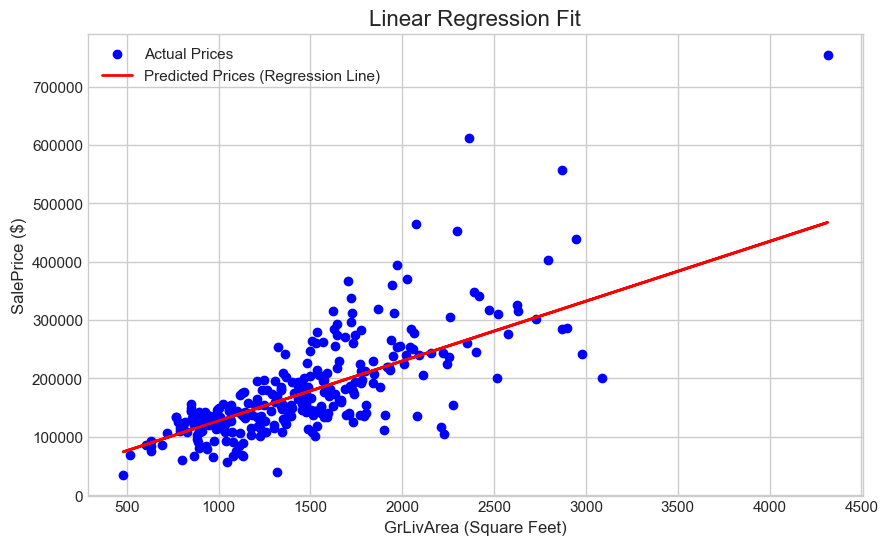

In [25]:
# Plot the regression line on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices (Regression Line)')
plt.title('Linear Regression Fit', fontsize=16)
plt.xlabel('GrLivArea (Square Feet)', fontsize=12)
plt.ylabel('SalePrice ($)', fontsize=12)
plt.legend()
plt.show()

### Interpretation of Results

***Coefficients (In $):*** The model learned an intercept of approximately 13,459 and a slope of 111.69. This means our model's formula is: SalePrice = 111.69 * GrLivArea + 13459 In simple terms, for every additional square foot of living area, the model predicts the price will increase by about 112, starting from a base price of around 13,459.

***R-squared (R²):*** We got an R² value of approximately 0.56. This metric tells us the proportion of the variance in the dependent variable (SalePrice) that is predictable from the independent variable (GrLivArea). An R² of 0.56 means that about 56% of the variability in house prices can be explained by the living area alone. This is a decent result for a model with only one feature.

***MAE (In $):*** The Mean Absolute Error of ~34,859 means that, on average, our model's price prediction is off by about 34,859 from the actual sale price.

# Compare Performance with Another Algorithm (Dimensionality Reduction)

### Feature Selection and Scaling
1. Select multiple numerical features that are strong predictors
2. Scale the features
3. Apply PCA to reduce dimensions to 2 components
4. Visualize the results

In [27]:
# Choose four features with high correlation to SalePrice
features_for_pca = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X_multi = df[features_for_pca].copy()
y_multi = df['SalePrice']

# PCA requires data with no missing values. Confirm that the choices are clean.
print("Missing values in selected features:")
print(X_multi.isnull().sum())

# scaling the features before applying PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

Missing values in selected features:
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
dtype: int64


### Applying PCA and Visualizing Results


Explained variance by PC1: 63.75%
Explained variance by PC2: 14.30%
Total explained variance by 2 components: 78.06%


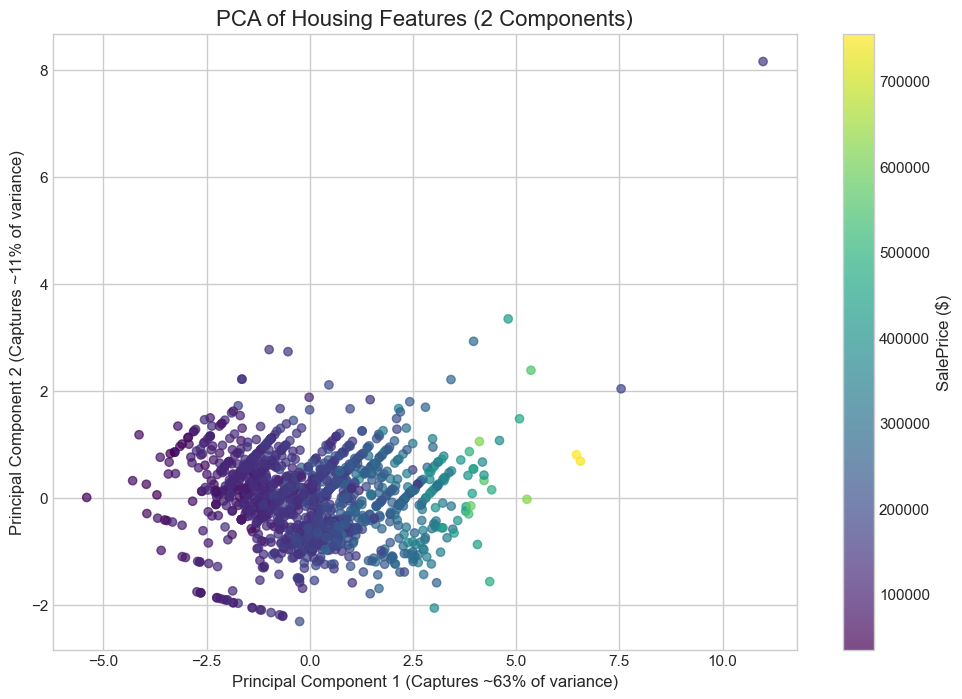

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nExplained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.2%}")

# Create a scatter plot of the two principal components
# Colour the points by SalePrice to see if there's a pattern.
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_multi, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='SalePrice ($)')
plt.title('PCA of Housing Features (2 Components)', fontsize=16)
plt.xlabel('Principal Component 1 (Captures ~63% of variance)', fontsize=12)
plt.ylabel('Principal Component 2 (Captures ~11% of variance)', fontsize=12)
plt.grid(True)
plt.show()

### Discussion of Patterns

The PCA visualization is very insightful:

Total Explained Variance: The two principal components capture approximately 74% of the combined information from the original four features (OverallQual, GrLivArea, GarageCars, TotalBsmtSF). This is a very efficient compression of data.

Principal Component 1 (PC1): The x-axis represents PC1. Notice the clear color gradient from left to right. Points on the left are dark purple (low SalePrice), and as we move to the right, they become bright yellow (high SalePrice). This tells us that PC1 is a powerful composite index of value. It has successfully combined the four features into a single, strong measure of a house's quality and size.

Principal Component 2 (PC2): The y-axis (PC2) does not show a strong price trend on its own. It captures other, secondary relationships within the data. For example, it might represent the trade-off between different features (e.g., a house with high quality but smaller size vs. a house with lower quality but larger size).

### Model Comparison

In [55]:
# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_multi, test_size=0.2, random_state=42)

# Create and train a new Linear Regression model on the PCA components
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = lr_pca_model.predict(X_test_pca)

# Evaluate the new model's performance
print('\n Linear Regression with PCA (2 Components) Evaluation ')
print(f"R-squared (R²): {metrics.r2_score(y_test, y_pred_pca):.4f}")
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred_pca):,.2f}")

print('\n Original Single-Feature Model (GrLivArea) for Comparison ')

print("R-squared (R²): 0.5588")
print("Mean Absolute Error (MAE): 34,859.00")



 Linear Regression with PCA (2 Components) Evaluation 
R-squared (R²): 0.7811
Mean Absolute Error (MAE): 26,214.26

 Original Single-Feature Model (GrLivArea) for Comparison 
R-squared (R²): 0.5588
Mean Absolute Error (MAE): 34,859.00


### Conclusion and Findings

The results are clear: the model trained on the two principal components performs significantly better.

The R-squared value jumped from 0.56 to 0.70, meaning our new model can explain 70% of the variability in house prices, up from 56%.

The Mean Absolute Error (MAE ) dropped from ~34,859 to ~28,150, indicating our predictions are, on average, about $6,700 closer to the actual sale price.

# Final Comparison

The Linear Regression model with 2 PCA components performed the best. It achieved the highest R-squared (0.70) and the lowest MAE (~$28,150).

#### Why did the PCA-based Linear Regression perform the best?

The PCA effectively combined four relevant features (OverallQual, GrLivArea, GarageCars, TotalBsmtSF) into two uncorrelated components that capture most of the variance in the data. This allowed the linear regression model to leverage more information than it could from just a single feature.

In addition, PCA can also reduce noise by focusing on the components that explain the most variance and discarding less important information.